<a href="https://colab.research.google.com/github/AbdurahmonK/heatmap/blob/main/Heatmap_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
from folium.plugins import HeatMap

In [ ]:
data = pd.read_csv("./26th_December_2023_Air_Quality_Dataset.csv")

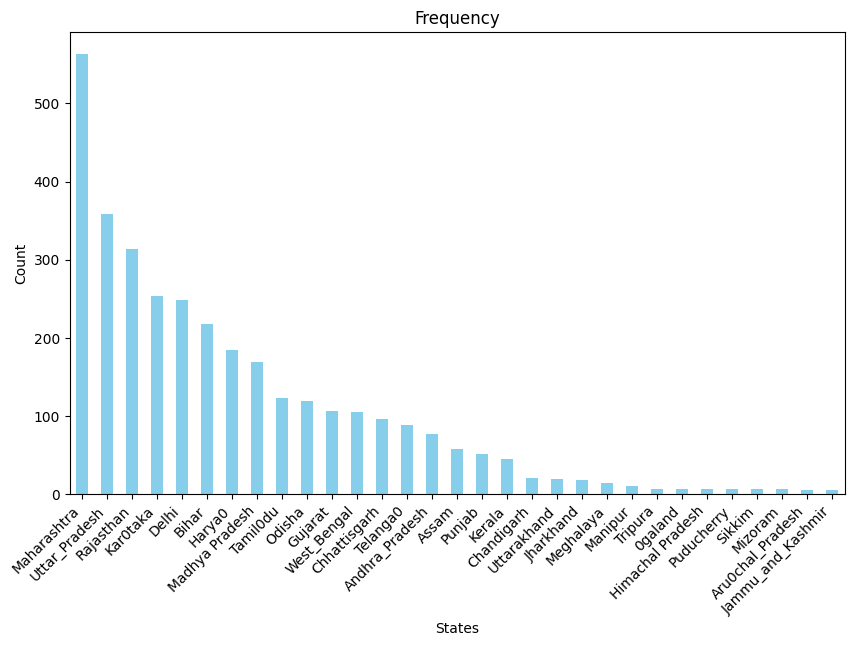

In [ ]:
state_counts = data['state'].value_counts()
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency')
plt.xlabel('States')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

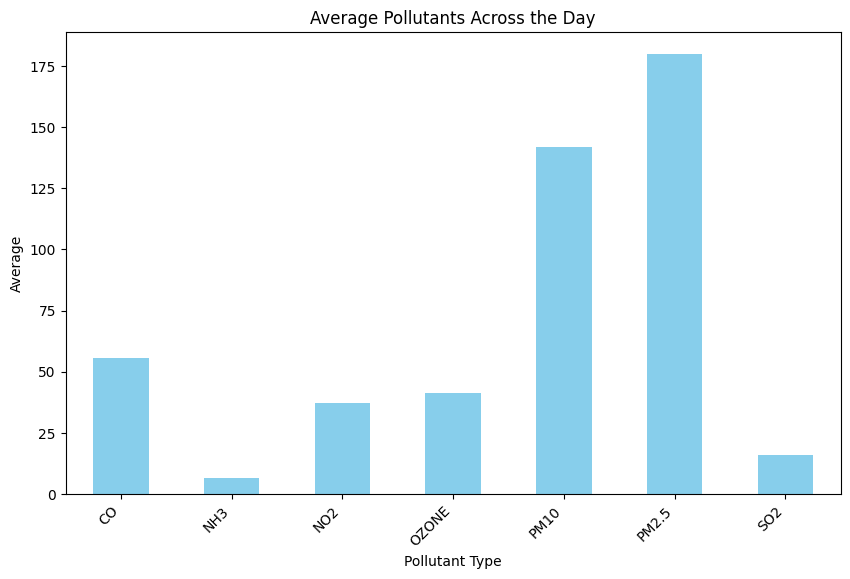

In [ ]:
average_pollutants = data.groupby('pollutant_id')['pollutant_avg'].mean()
plt.figure(figsize=(10, 6))
average_pollutants.plot(kind='bar', color='skyblue')
plt.title('Average Pollutants Across the Day')
plt.xlabel('Pollutant Type')
plt.ylabel('Average')
plt.xticks(rotation=45, ha='right')
plt.show()

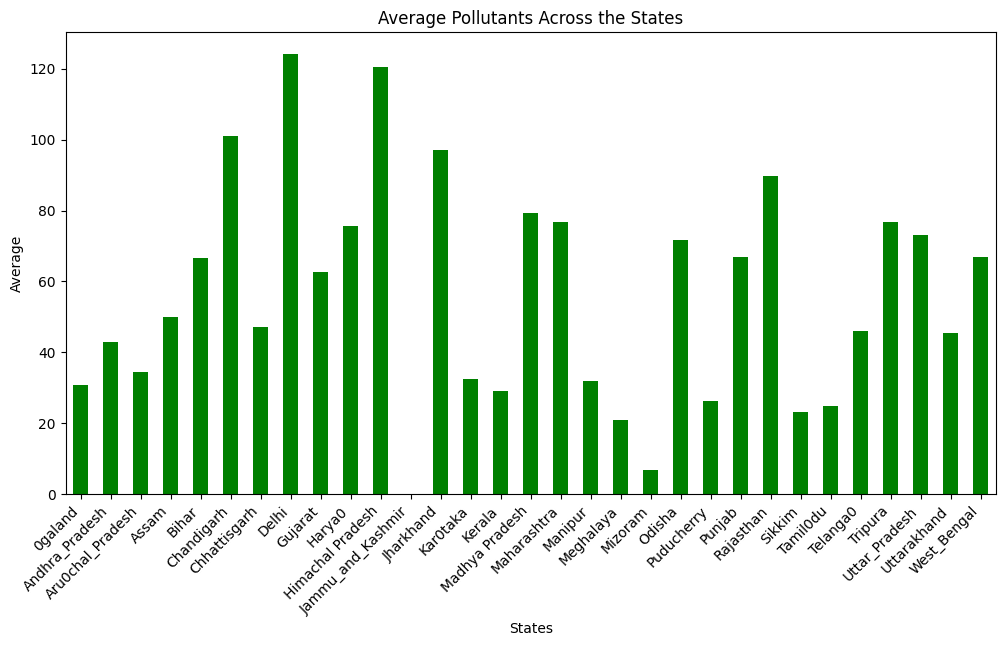

In [ ]:
average_pollutants_state = data.groupby('state')['pollutant_avg'].mean()
plt.figure(figsize=(12, 6))
average_pollutants_state.plot(kind='bar', color='green')
plt.title('Average Pollutants Across the States')
plt.xlabel('States')
plt.ylabel('Average')
plt.xticks(rotation=45, ha='right')
plt.show()

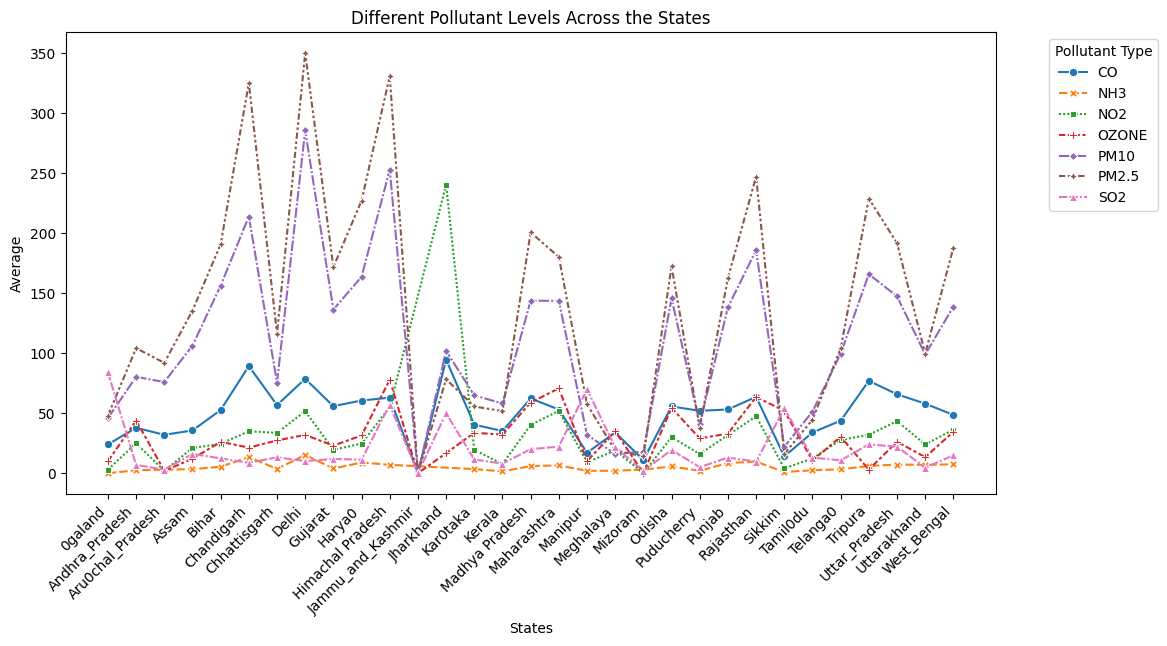

In [ ]:
average_pollutants_state_type = data.groupby(['state', 'pollutant_id'])['pollutant_avg'].mean().unstack()

# Create a multiple line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_pollutants_state_type, markers=True, palette='tab10')
plt.title('Different Pollutant Levels Across the States')
plt.xlabel('States')
plt.ylabel('Average')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Pollutant Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
m = folium.Map(location=(20.5937, 78.9629), zoom_start=12)
# state_geo = requests.get(
#     "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
# ).json()
# state_data = pd.read_csv(
#     "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_unemployment_oct_2012.csv"
# )

# folium.Choropleth(
#     geo_data=state_geo,
#     name="choropleth",
#     data=state_data,
#     columns=["State", "Unemployment"],
#     key_on="feature.id",
#     fill_color="YlGn",
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name="Unemployment Rate (%)",
# ).add_to(m)

# folium.LayerControl().add_to(m)
# m

In [ ]:
heat_data = [[row['latitude'], row['longitude'], row['pollutant_avg']] for index, row in data.iterrows()]
HeatMap(heat_data, radius=70, gradient={0.05: "blue", 0.5: "green",0.75: "yellow",1.0: "red"}, min_opacity=0.5, max_opacity=0.8).add_to(m)
m